1. Dataset = speciic chronic conditions
2. the dictionary does not really document how missing values are handled.

Only for one it states:
- for the Beneficiary Geographic Code term, The Bene_Geo_Cd will be blank for data aggregated at the National level or for Puerto Rico and Virgin Islands.
- from looking at the data in excel, there are a lot of blank spots under the last 4 columns (Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC, Hosp_Readmsn_Rate, ER_Visits_Per_1000_Benes, ER_Visits_Per_1000_Benes) with only being filled for every 11th row, but gradually beings to fill.

The data disctionary is ok. Its short, only two pages, and clearly layed out. However, it combined a bunch of details into one paragraph within a box of a table, making it kind of hard to separate out or find certain points.
3. I found state and prevalence jointly interesting because they can relate chronic illnesses to geographical regions.




In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:

df = pd.read_csv('/content/CC_R20_P08_v10_D18_WWDSE_Cond.csv', low_memory=False) # load in data
print(df.shape) # list dimensions of dataframe(rows, columns)
df.head(10) # shows me first 10 rows of data

(236124, 12)


,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
0,State,Alabama,1.0,All,All,All,Alcohol Abuse,0.0188,25102.3405,23348.6039,0.2413,2184.7557
1,State,Alabama,1.0,65+,Dual Status,Medicare Only,Alcohol Abuse,0.0118,NaN,NaN,NaN,NaN
2,State,Alabama,1.0,<65,Dual Status,Medicare Only,Alcohol Abuse,0.0320,NaN,NaN,NaN,NaN
3,State,Alabama,1.0,All,Dual Status,Medicare Only,Alcohol Abuse,0.0147,NaN,NaN,NaN,NaN
4,State,Alabama,1.0,65+,Dual Status,Medicare and Medicaid,Alcohol Abuse,0.0238,NaN,NaN,NaN,NaN
5,State,Alabama,1.0,<65,Dual Status,Medicare and Medicaid,Alcohol Abuse,0.0465,NaN,NaN,NaN,NaN
6,State,Alabama,1.0,All,Dual Status,Medicare and Medicaid,Alcohol Abuse,0.0347,NaN,NaN,NaN,NaN
7,State,Alabama,1.0,65+,Sex,Female,Alcohol Abuse,0.0058,NaN,NaN,NaN,NaN
8,State,Alabama,1.0,<65,Sex,Female,Alcohol Abuse,0.0235,NaN,NaN,NaN,NaN
9,State,Alabama,1.0,All,Sex,Female,Alcohol Abuse,0.0092,NaN,NaN,NaN,NaN


In [12]:
# cleaning data

#string data
state = df['Bene_Geo_Desc'] # nothing to clean here
pd.crosstab(df['Bene_Geo_Desc'], df['Bene_Cond']) # cross tabs 'Room Type' and 'Property Type' variables
#df['Bene_Geo_Desc'] = state # Replace data column with cleaned values
#del state


Bene_Cond,Alcohol Abuse,Alzheimer's Disease/Dementia,Arthritis,Asthma,Atrial Fibrillation,Autism Spectrum Disorders,COPD,Cancer,Chronic Kidney Disease,Depression,...,Drug/Substance Abuse,HIV/AIDS,Heart Failure,Hepatitis (Chronic Viral B & C),Hyperlipidemia,Hypertension,Ischemic Heart Disease,Osteoporosis,Schizophrenia and Other Psychotic Disorders,Stroke
Bene_Geo_Desc,,,,,,,,,,,,,,,,,,,,,
Alabama,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
Alabama : Autauga,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Alabama : Baldwin,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Alabama : Barbour,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Alabama : Bibb,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming : Teton,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Wyoming : Uinta,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Wyoming : Unknown,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


<Axes: xlabel='Bene_Demo_Lvl', ylabel='Count'>

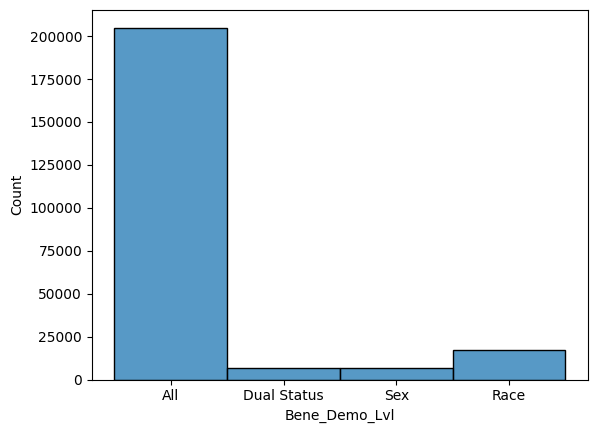

In [13]:
# couldn't really do a barplot with this data, too many of same observance for a given varibale
var1 = df['Bene_Demo_Lvl']
var2 = df['Bene_Cond']
cat1 = df['Bene_Demo_Desc']
cat2 = df['Bene_Geo_Lvl']

sns.histplot(data=df, x=var1) # Our initial plot

In [5]:


#numeric data
prev = df['Prvlnc']
prev = pd.to_numeric(prev,errors='coerce') # coerces values to numeric data type
df['Prvlnc'] = prev # Replace data column with cleaned values
del prev

#numeric data
spending = df['Tot_Mdcr_Pymt_PC']
spending = pd.to_numeric(spending,errors='coerce') # coerces values to numeric data type
df['Tot_Mdcr_Pymt_PC'] = spending # Replace data column with cleaned values
del spending

<Axes: xlabel='Prvlnc'>

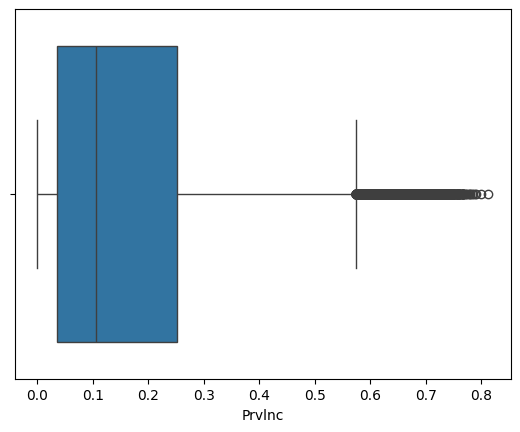

In [7]:
# making boxplot for prevalence
sns.boxplot(data=df,x=df['Prvlnc'])


<Axes: xlabel='Tot_Mdcr_Pymt_PC'>

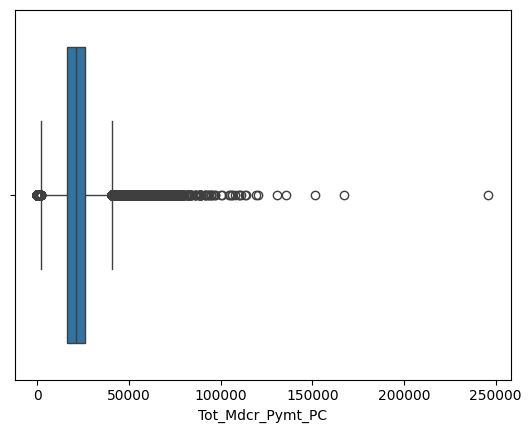

In [10]:
# making boxplot for spending
sns.boxplot(data=df,x=df['Tot_Mdcr_Pymt_PC'])


In [ ]:
# many outliers in the data

<Axes: xlabel='Tot_Mdcr_Pymt_PC', ylabel='Density'>

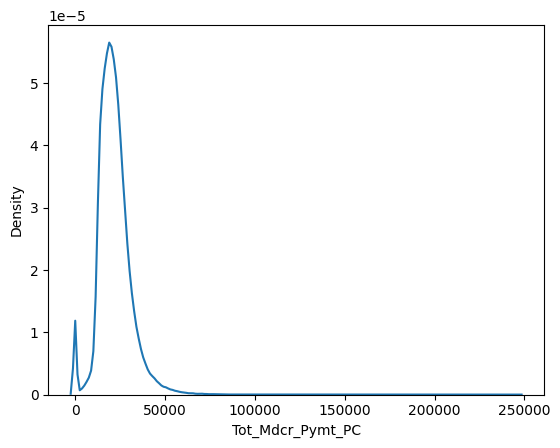

In [15]:
sns.kdeplot(data=df,x=df['Tot_Mdcr_Pymt_PC'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Tot_Mdcr_Pymt_PC_log', ylabel='Density'>

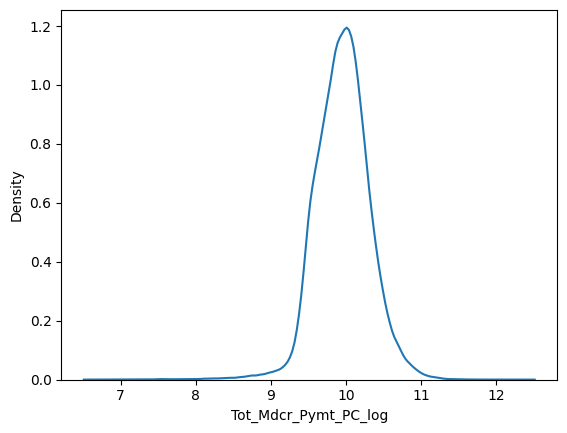

In [16]:
# the results probably require some scaling
df['Tot_Mdcr_Pymt_PC_log'] = np.log(df['Tot_Mdcr_Pymt_PC'])
sns.kdeplot(data=df,x='Tot_Mdcr_Pymt_PC_log') # Using a log transformation

<Axes: xlabel='Tot_Mdcr_Stdzd_Pymt_PC', ylabel='Prvlnc'>

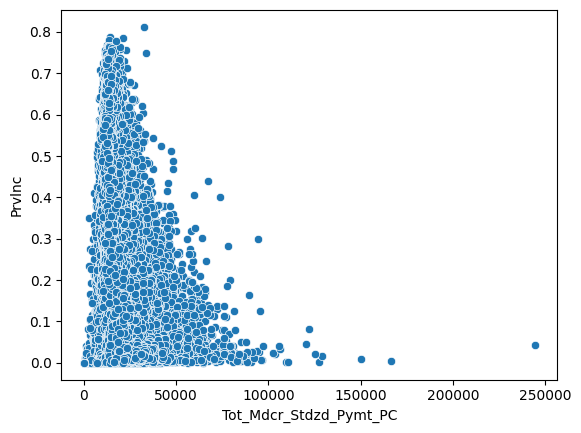

In [23]:
sns.scatterplot(x=df['Tot_Mdcr_Stdzd_Pymt_PC'],y=df['Prvlnc'])

In [ ]:
# most of Total Medicare Per Capita Spending is below 50000

In [25]:

df['Prvlnc'].describe() # provides statistical description of variable

count    192537.000000
mean          0.160059
std           0.154637
min           0.000000
25%           0.035900
50%           0.105300
75%           0.250900
max           0.812500
Name: Prvlnc, dtype: float64

In [ ]:
# data isn't scaled very well, lot of outliers according to boxplot